In [1]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt

In [2]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])      # Because it has only one channel one 0.5

train = datasets.MNIST('./data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

# test = datasets.MNIST('./data', download=True, train=False, transform=transform)
# testloader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)

In [3]:
trainiter = iter(trainloader)
images, labels = trainiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


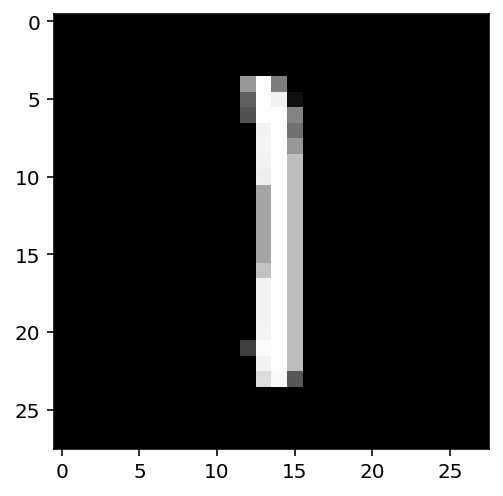

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [32]:
def activation(x):
    return 1/(1+torch.exp(-1*x))

input = images.view(images.shape[0], -1)      # Flatten your images

w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

hidden = activation(torch.mm(input, w1) + b1)
output = torch.mm(hidden, w2) + b2

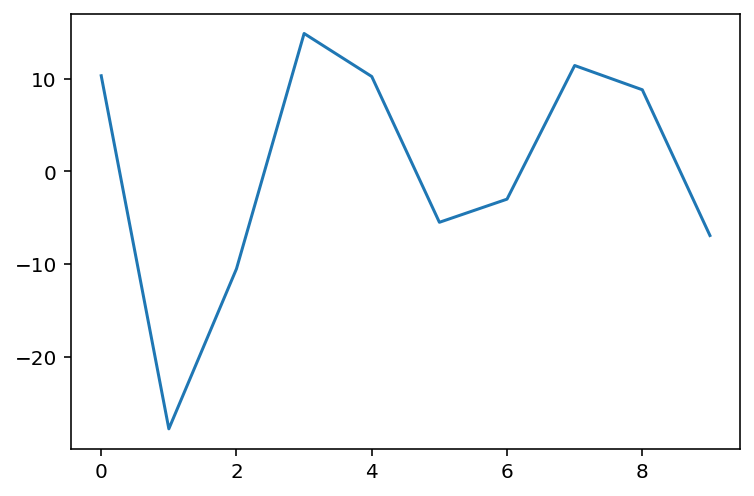

In [16]:
plt.plot(output[1])

In [35]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)
prob = softmax(output)
print(prob.sum(dim=1))

tensor([[  5.7730,   2.7387,   0.2932, -11.3324, -10.1853,  -2.9017,  -1.8366,
          -4.1036, -20.9467,   6.7958]])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [36]:
from torch import nn

In [42]:
class mnist_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
            
        self.hidden = nn.Linear(784, 256)         # Linear Transformation
        self.output = nn.Linear(256, 10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def Forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [43]:
model = mnist_Classifier()
print(model)

mnist_Classifier(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)


In [44]:
import torch.nn.functional as F

class mnist_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
            
        self.hidden = nn.Linear(784, 256)         # Linear Transformation
        self.output = nn.Linear(256, 10)
        
    def Forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [45]:
model = mnist_Classifier()
print(model)

mnist_Classifier(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)


In [46]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
    def Forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [47]:
model = Network()
print(model)

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)
